In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [13]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [14]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 6704 rows and 6 columns


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 235.8+ KB


In [16]:
df.describe(include='all')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,6702.000000,6702,6701,6702,6701.000000,6699.000000
unique,NaN,3,7,193,NaN,NaN
top,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN
freq,NaN,3674,2267,518,NaN,NaN
mean,33.620859,NaN,NaN,NaN,8.094687,115326.964771
std,7.614633,NaN,NaN,NaN,6.059003,52786.183911
min,21.000000,NaN,NaN,NaN,0.000000,350.000000
25%,28.000000,NaN,NaN,NaN,3.000000,70000.000000
50%,32.000000,NaN,NaN,NaN,7.000000,115000.000000
75%,38.000000,NaN,NaN,NaN,12.000000,160000.000000


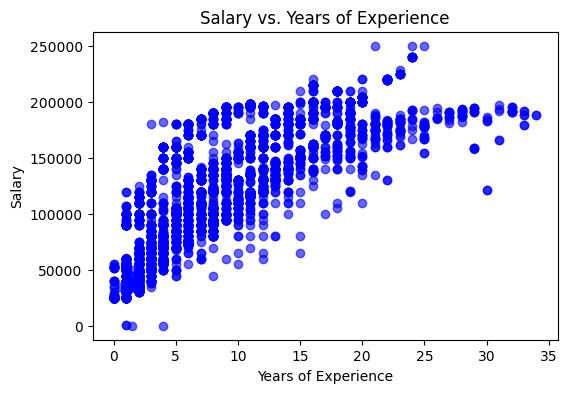

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(df['Years of Experience'], df['Salary'], color='blue', alpha=0.6)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [18]:
# Drop missing values before regression
df_reg = df[['Years of Experience', 'Salary']].dropna()
X = df_reg[['Years of Experience']].values  # feature must be 2D
y = df_reg['Salary'].values
print(f"After dropping missing values: {X.shape[0]} samples left")

After dropping missing values: 6699 samples left


In [19]:
model = LinearRegression()
model.fit(X, y)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (slope): {model.coef_[0]}")

Intercept: 58283.27509418093
Coefficient (slope): 7046.768344027254


In [20]:
y_pred = model.predict(X)
print(f"R^2 Score: {r2_score(y, y_pred)}")

R^2 Score: 0.6544307456514593


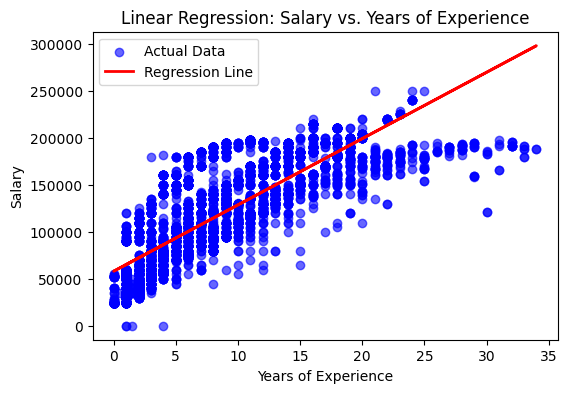

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [22]:
example_years = np.array([[5], [10]])
predicted_salaries = model.predict(example_years)
for yrs, sal in zip(example_years.flatten(), predicted_salaries):
    print(f"Predicted salary for {yrs} years of experience: {sal:.2f}")

Predicted salary for 5 years of experience: 93517.12
Predicted salary for 10 years of experience: 128750.96
